<a href="https://colab.research.google.com/github/sam2005-max/my_tu_verass/blob/main/My_Tu_Verras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn
import pandas as pd
import numpy as np
import sklearn
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt


In [ ]:
def load_dataset():
    url = 'https://storage.googleapis.com/qwasar-public/track-ds/boston.csv'
    dataframe = pd.read_csv(url)
    return  dataframe
boston_dataframe = load_dataset()




,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
def print_summarize_dataset(dataset):
   print("Dataset dimension:")
   print(dataset.shape)
   print("First 10 rows of dataset:")
   print(dataset.head(10))
   print("Statistical summary:")
   print(dataset.describe())
print_summarize_dataset(dataset)
# def print_summarize_dataset(dataset):
#     print("Dataset dimension:")
#     print(dataset.shape)
#     print()
#     print("First 10 rows of dataset:")
#     print(dataset.head(10))
#     print()
#     print("Statistical summary:")
#     print(dataset.describe(include='all'))
# print_summarize_dataset(boston_dataframe)


In [ ]:
print(boston_dataframe[:20])

In [ ]:
print(boston_dataframe[:20])

In [ ]:
def clean_dataset(boston_dataframe):
    return boston_dataframe.dropna()
boston_dataframe = clean_dataset(boston_dataframe)

In [ ]:
# def print_histograms(boston_dataframe):
#     column = boston_dataframe.columns
#     boston_dataframe.hist(column=column,figsize=(21,16),bins=40)
# print_histograms(boston_dataframe)

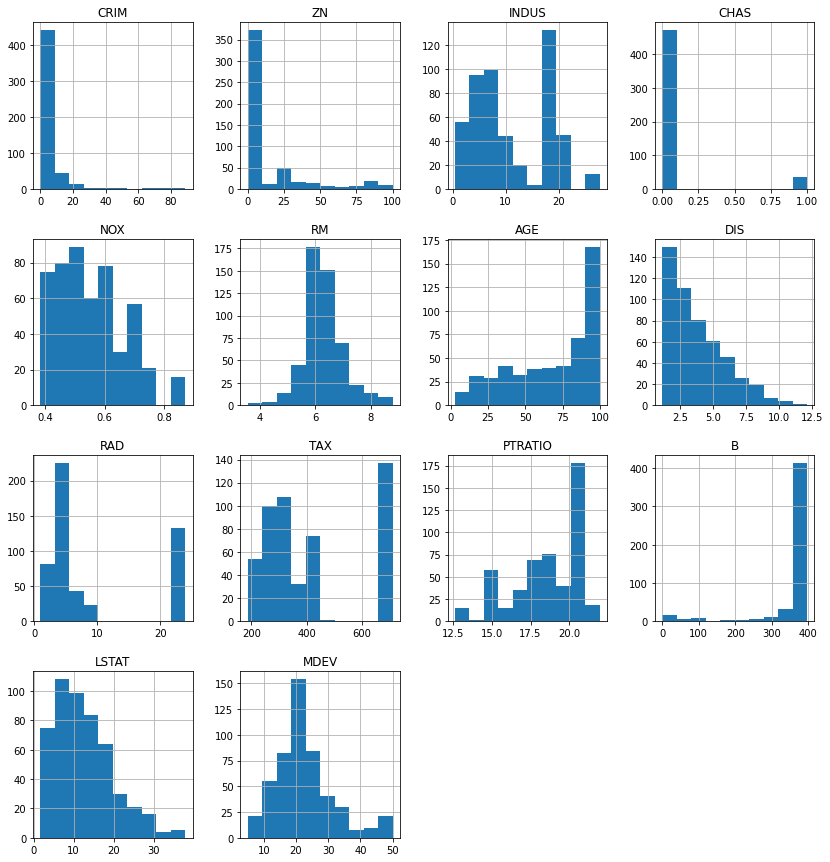

In [ ]:
def print_histograms(dataset):
  dataset.hist(bins=10,figsize=(14,15))
print_histograms(dataset)


In [ ]:
# def compute_correlations_matrix(boston_dataframe):
#     return boston_dataframe.corr()
# correlations = compute_correlations_matrix(boston_dataframe)
# print(correlations['MDEV'])

In [ ]:
def compute_correlations_matrix(boston_dataframe):

  correlations = boston_dataframe.corr()
  res = correlations["MDEV"].abs().sort_values(ascending=False)
  print(res)
  x = np.median(res)
  print(f"median is {x} ")
compute_correlations_matrix(dataset)

MDEV       1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.385832
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: MDEV, dtype: float64
median is 0.40657623112863606 


In [ ]:
# dataset['MDEV'].hist(bins=10)
# plt.show()

In [ ]:
# def print_scatter_matrix(boston_dataframe):
#     pd.plotting.scatter_matrix(boston_dataframe, figsize=(40,30))
# print_scatter_matrix(boston_dataframe)

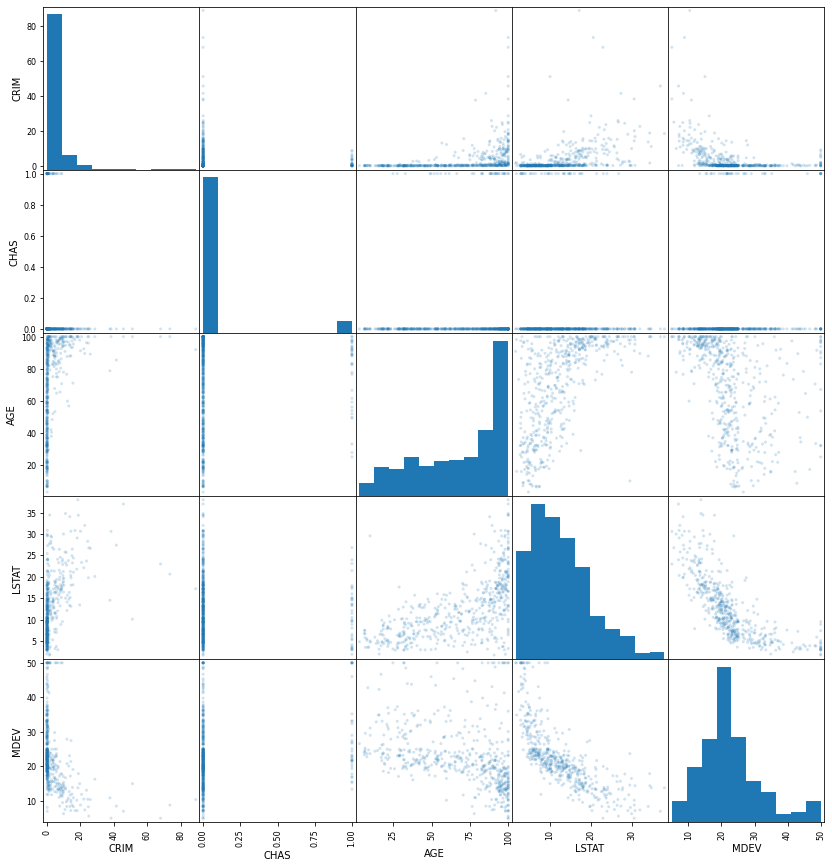

In [ ]:
def print_scatter_matrix(dataset):
  df = dataset[['CRIM','CHAS','AGE','LSTAT','MDEV']]
  pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(14,15))
print_scatter_matrix(dataset) 

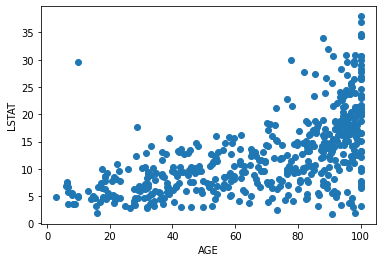

In [ ]:
plt.scatter(dataset.AGE, dataset.LSTAT)
plt.ylabel('LSTAT')
plt.xlabel('AGE')
plt.show()



In [ ]:
# fig,(ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(40,8))
# ax1.scatter(boston_dataframe['LSTAT'], boston_dataframe['MDEV'])
# ax1.set_xlabel('LSTAT')
# ax1.set_ylabel('MDEV')
# ax2.scatter(boston_dataframe['AGE'], boston_dataframe['MDEV'])
# ax2.set_xlabel('AGE')
# ax2.set_ylabel('MDEV')
# ax3.scatter(boston_dataframe['CRIM'], boston_dataframe['MDEV'])
# ax3.set_xlabel('CRIM')
# ax3.set_ylabel('MDEV')
# plt.show()

In [ ]:
def boston_fit_model(dataset):
  model_dataset = dataset[["RM","MDEV"]]
  regressor = sklearn.linear_model.LinearRegression()
  # Extract column 1
  x = model_dataset.iloc[:, :-1].values
  # Extract column 2
  y = model_dataset.iloc[:, 1].values
  # Train the model
  x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=2) 
  regressor.fit(x_train, y_train)
  return regressor


In [ ]:
def boston_fit_model(boston_dataframe):
    # SELECT two columns from our
    model_dataset = boston_dataframe[["RM","MDEV"]]
    regressor = LinearRegression()
    # Extract column 1
    x = model_dataset.iloc[:, :-1].values
    # Extract column 2
    y = model_dataset.iloc[:, 1].values
    # Train the model
    regressor.fit(x, y)
    return regressor

In [ ]:
def boston_predict(estimator, array_to_predict):
    return estimator.predict(array_to_predict)
data = [1, 2, 3]
estimator = boston_fit_model(boston_dataframe)
print(boston_predict(estimator, np.array(data).reshape(-1,1)))

In [ ]:
def print_model_prediction_evaluator(base_test, prediction):
    print('Mean Absolute Error:', metrics.mean_absolute_error(base_test, prediction))
    print('Mean Squared Error:', metrics.mean_squared_error(base_test, prediction))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(base_test, prediction)))

Mean Absolute Error: 4.090064955184419
Mean Squared Error: 30.65759280465092
Root Mean Squared Error: 5.536929907868703


In [ ]:
x = boston_dataframe.loc[:,'RM'].values.reshape(-1,1)
prediction = boston_predict(estimator, x)
base_test = boston_dataframe.loc[:,'MDEV'].values
print_model_prediction_evaluator(base_test, prediction)